In [31]:
import math
import cmath
import sympy as sp
from IPython.display import display
from matplotlib.ticker import EngFormatter

In [32]:
# Initialize engineering formatter
engf = EngFormatter(places=2)

In [33]:
# Functions to help series/parallel calculations
def recipsumrecip(data):
    # Returns the reciprocal of the sum of the reciprocals
    denom = 0
    for n in data:
        denom += 1/n
    return 1/denom

def recip(num):
    return 1/num

parallel = recipsumrecip
series = sum

In [34]:
class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto

In [35]:
def get_inductive_reactance(inductance,frequency):
    """
    Returns a complex number representing the impedance vector of an inductive reactance.
    Variables:
      inductance: The inductance measured in Henries
      frequency: The frequency measured in Hertz
    """
    period = 2*math.pi
    omega = period*frequency
    Xl = omega*inductance
    return complex(0,Xl)

In [36]:
def get_capacitive_reactance(capacitance,frequency):
    """
    Returns a complex number representing the impedance vector of an capacitive reactance.
    Variables:
      capacitance: The capacitance measured in Farads
      frequency: The frequency measured in Hertz
    """
    period = 2*math.pi
    omega = period*frequency
    Xc = 1/(omega*capacitance)
    return complex(0,-Xc)

In [37]:
def polar_format(complex_number):
    magnitude, radians = cmath.polar(complex_number)
    degrees = math.degrees(radians)
    return (magnitude,degrees)

def rect_format(magnitude,degrees):
    radians = math.radians(degrees)
    real = magnitude * math.cos(radians)
    imaginary = magnitude * math.sin(radians)
    return complex(real,imaginary)

### 2

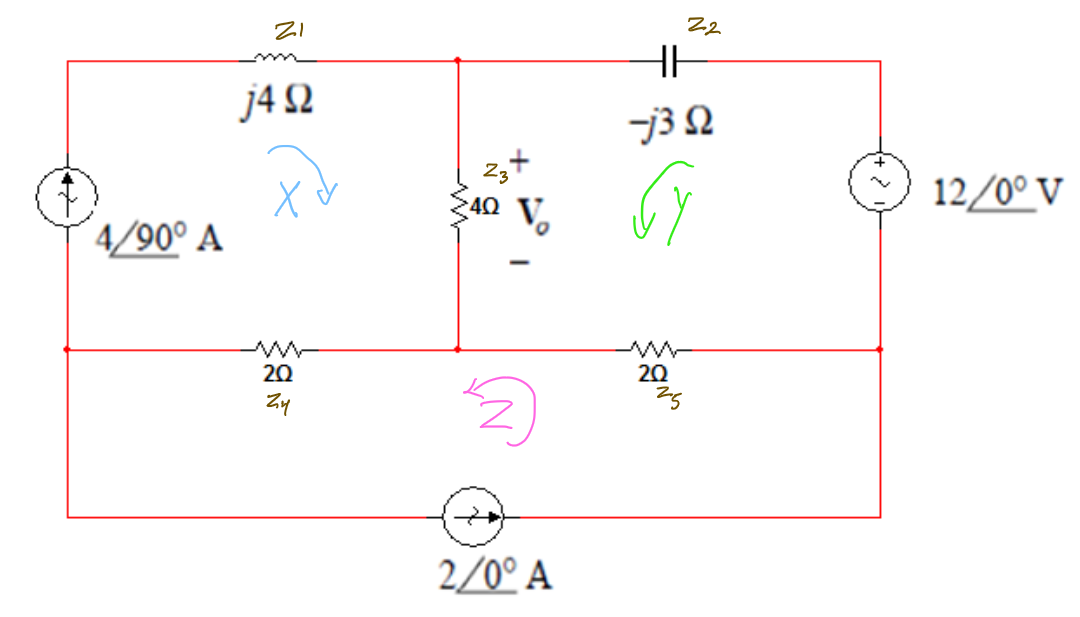

$$
V_0 = 16 \angle 36.9° V
$$

In [38]:
y = sp.symbols('y')

In [39]:
expr1 = 12 - -3j*y - 4*(y+4j) -4
expr1

-4*y + 3.0*I*y + 8 - 16.0*I

In [40]:
eq1 = sp.Eq(expr1, 0)
ans = sp.solve(eq1, y)[0]
ans

3.2 - 1.6*I

In [53]:
iy = ans
ix = 4j
vo = 4*(iy+ix)
vo

12.8 + 9.6*I

In [54]:
polar_format(vo)

(16.0, 36.86989764584402)

### 3

In [42]:
i1,i2,i3 = sp.symbols('I_1, I_2, I_3')

In [43]:
expr1 = 80*i1 - 40j*i1 + 40j*i2 +50 - 86.6j
expr1

80*I_1 - 40.0*I*I_1 + 40.0*I*I_2 + 50 - 86.6*I

In [44]:
expr2 = -20j*i2 + 40j*i1 + 40j*i3
expr2

40.0*I*I_1 - 20.0*I*I_2 + 40.0*I*I_3

In [45]:
expr3 = 20*i3 - 40j*i3 + 40j*i2 + rect_format(-51.961,30)
expr3

40.0*I*I_2 + 20*I_3 - 40.0*I*I_3 - 44.9995460060432 - 25.9805*I

In [46]:
exprs = [expr1, expr2, expr3]
vars = [i1, i2, i3]
A= sp.Matrix([
    [expr.coeff(var) for var in vars] for expr in exprs

])
A

Matrix([
[80 - 40.0*I,  40.0*I,           0],
[     40.0*I, -20.0*I,      40.0*I],
[          0,  40.0*I, 20 - 40.0*I]])

In [47]:
substitutions = dict(zip(vars, [0 for var in vars]))
b = sp.Matrix(
    [-expr.subs(substitutions) for expr in exprs]
)
b

Matrix([
[                -50 + 86.6*I],
[                           0],
[44.9995460060432 + 25.9805*I]])

In [50]:
def cramers_rule(A,b):
    display(A)
    det_A = A.det()
    print(f"detA= {det_A}\n")

    if det_A == 0:
        raise ValueError("The $\det(A)$ is zero; the system has no unique solution.")
    
    solutions = []

    for i in range(A.cols):
        print(f'I={i}')
        
        A_i = A.copy()
        A_i[:, i] = b
        display(A_i)
        
        det_Ai = A_i.det()
        print(f"det{i}= {det_Ai}")
        
        sol = det_Ai/det_A
        solutions.append(sol.evalf())
        print(f"sol{i}= {sol}\n")

    return solutions



In [51]:
sol = cramers_rule(A,b)
sol

Matrix([
[80 - 40.0*I,  40.0*I,           0],
[     40.0*I, -20.0*I,      40.0*I],
[          0,  40.0*I, 20 - 40.0*I]])

detA= 80000.0 - 128000.0*I

I=0


Matrix([
[                -50 + 86.6*I,  40.0*I,           0],
[                           0, -20.0*I,      40.0*I],
[44.9995460060432 + 25.9805*I,  40.0*I, 20 - 40.0*I]])

det0= -77359.2736096692 + 47711.2*I
sol0= 4.38904494382022e-11*(-77359.2736096692 + 47711.2*I)*(80000.0 + 128000.0*I)

I=1


Matrix([
[80 - 40.0*I,                 -50 + 86.6*I,           0],
[     40.0*I,                            0,      40.0*I],
[          0, 44.9995460060432 + 25.9805*I, 20 - 40.0*I]])

det1= 160418.326390331 - 284127.347219338*I
sol1= 4.38904494382022e-11*(80000.0 + 128000.0*I)*(160418.326390331 - 284127.347219338*I)

I=2


Matrix([
[80 - 40.0*I,  40.0*I,                 -50 + 86.6*I],
[     40.0*I, -20.0*I,                            0],
[          0,  40.0*I, 44.9995460060432 + 25.9805*I]])

det2= 157568.436804835 - 189774.873609669*I
sol2= 4.38904494382022e-11*(80000.0 + 128000.0*I)*(157568.436804835 - 189774.873609669*I)



[-0.539667112393501 - 0.267077379829602*I,
 2.1594876472657 - 0.0964116046166043*I,
 1.61941093602635 + 0.2188715775213*I]

In [52]:
polar_format(sol[1])

(2.1616387524741287, -2.5563064676311913)